## I. Prep Work

Importing Libraries and loading dataset.


In [4]:
# NumPy for numerical computing
import numpy as np


# Pandas for DataFrames

import pandas as pd 

# Matplotlib for visualization

from matplotlib import pyplot as plt 
%matplotlib inline 
# Seaborn for easier visualization
import seaborn as sns 
sns.set_style('darkgrid')


# (Optional) Suppress FutureWarning
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Reading in the Dataset.
* The file name is <code style="color:crimson">'employee_data.csv'</code>

In [5]:
df = pd.read_csv('employee_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


### Replacing Categorical Variables and Empty Values
* Replace categorical values (low, medium, high) with numerical values (0, 1, 2) for easier analysis 
* Replace missing (NaN) values with 0 for easier analysis 

In [7]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)
df['salary_numeric'] = df.salary.replace({'low': 0, 'medium': 1, 'high': 2})

## <span style="color:RoyalBlue"> 1.1 - Basic Information</span>

#### A.) Displaying the <span style="color:royalblue">dimensions</span> (a.k.a. shape) of the dataset.

In [8]:
df.shape

(14249, 11)

#### B.) Displaying the <span style="color:royalblue">datatypes</span> of the features.

In [9]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
salary_numeric         int64
dtype: object

#### C.) Displaying the first 10 <span style="color:royalblue">example observations</span> from the dataset.

In [10]:
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0,1
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,Employed,3.0,0
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,Employed,3.0,0
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,Employed,7.0,1
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,Employed,2.0,1


#### D.) Finally, displaying the last 10 rows of data to check for any signs of <span style="color:royalblue">corrupted data</span>.

In [11]:
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
14239,242,finance,0.0,0.781112,6,0.0,low,0.669866,Left,5.0,0
14240,131,engineering,0.0,0.531197,2,0.0,low,0.341842,Left,3.0,0
14241,235,IT,0.0,0.683498,3,0.0,medium,0.923564,Employed,3.0,1
14242,157,support,0.0,0.707167,5,0.0,low,0.834708,Employed,4.0,0
14243,272,engineering,0.0,0.815504,4,0.0,low,0.693387,Employed,2.0,0
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0,0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0,0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0,1
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0,1
14248,159,NaN,0.0,0.578742,3,0.0,medium,0.808850,Employed,3.0,1


## <span style="color:RoyalBlue"> 1.2 - Distributions of Numeric Features</span>

#### A.) Plotting the Pandas <span style="color:royalblue">histogram grid</span> for all the numeric features.


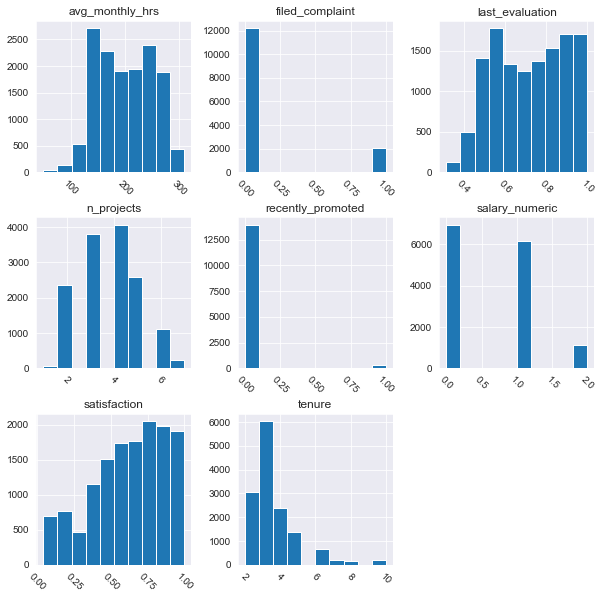

In [13]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

#### B.) Displaying formal <span style="color:royalblue">summary statistics</span> for the numeric features.

In [14]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
count,14249.000000,14249.000000,12717.000000,14249.000000,14249.000000,14068.000000,14068.000000,14249.000000
mean,199.795775,0.144431,0.718477,3.773809,0.021054,0.621295,3.497228,0.592884
std,50.998714,0.351539,0.173062,1.253126,0.143570,0.250469,1.460917,0.634788
min,49.000000,0.000000,0.316175,1.000000,0.000000,0.040058,2.000000,0.000000
25%,155.000000,0.000000,0.563866,3.000000,0.000000,0.450390,3.000000,0.000000
50%,199.000000,0.000000,0.724939,4.000000,0.000000,0.652527,3.000000,1.000000
75%,245.000000,0.000000,0.871358,5.000000,0.000000,0.824951,4.000000,1.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,2.000000


## <span style="color:RoyalBlue"> 1.3 - Distributions of Categorical Features</span>

#### A.) Displaying the <span style="color:royalblue">summary statistics</span> for categorical features in the dataset.

In [15]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


#### B.) Using a loop, displaying <span style="color:royalblue">bar plots</span> for each of the categorical features.

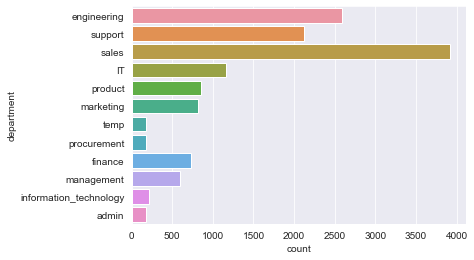

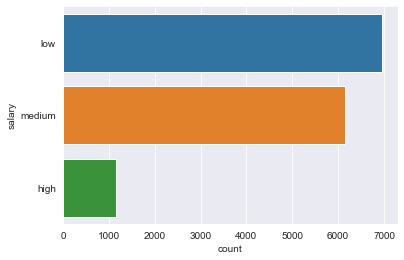

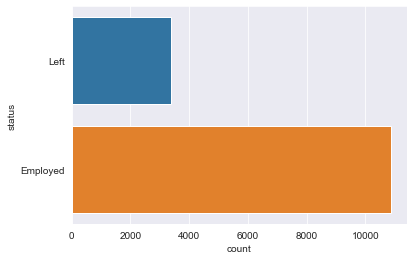

In [17]:
for i in df.dtypes[df.dtypes=='object'].index: 
    sns.countplot(y=i, data=df)
    plt.show()

## <span style="color:RoyalBlue"> 1.4 - Segmentations</span>

#### A.) First, displaying a <span style="color:royalblue">violin plot</span> with <code style="color:steelblue">'status'</code> on the y-axis and <code style="color:steelblue">'avg_monthly_hrs'</code> on the x-axis.

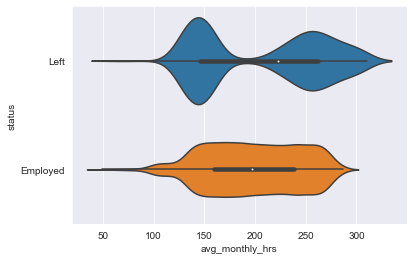

In [18]:
sns.violinplot(y='status', x='avg_monthly_hrs', data=df)
plt.show()

#### B.) Next, displaying a violin plot that segments <code style="color:steelblue">'last_evaluation'</code> by <code style="color:steelblue">'status'</code>.

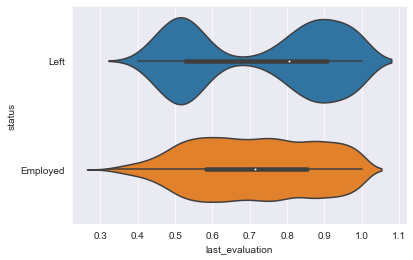

In [19]:
sns.violinplot(y='status', x='last_evaluation', data=df)
plt.show()

#### C.) <span style="color:royalblue">Grouping by</span> <code style="color:steelblue">'status'</code> and calculating the average value of each feature within each class.

In [20]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
status,,,,,,,,
Employed,197.700286,0.175187,0.714479,3.755273,0.025974,0.675979,3.380245,0.648061
Left,206.502948,0.045991,0.730706,3.833137,0.005307,0.447500,3.869023,0.416274


## <span style="color:RoyalBlue"> 1.5 - Ad Hoc Alterations</span>

#### A.) First, replacing all instances of the <code>'information_technology'</code> class with <code>'IT'</code> instead.

In [21]:
df.department.replace('information_technology', 'IT', inplace=True)

#### B.) Next, just so it doesn't clutter the outputs, I remove observations with the <code>'temp'</code> class for department.

In [22]:
df = df[df.department != 'temp']

#### C.) As a sanity check, displaying the bar plot for department distributions again.

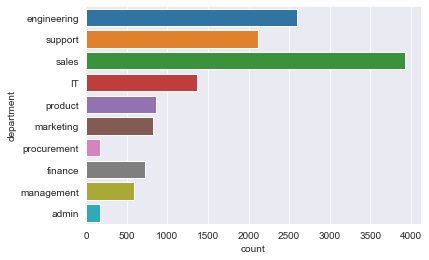

In [23]:
sns.countplot(y='department', data=df)
plt.show()

#### D.) Finally, determining which department had the employees who worked the most monthly hours on average.

In [24]:
df.groupby('department').mean().sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
department,,,,,,,,
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.627930,3.264368,0.557471
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.629122,3.567766,0.620269
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.628774,3.487209,0.577907
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.623075,3.527148,0.556207
support,200.975495,0.155042,0.723200,3.804430,0.008483,0.626923,3.394910,0.554194
management,201.025210,0.173109,0.729714,3.857143,0.114286,0.630428,4.294118,1.057143
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.586787,3.543956,0.641484
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.611450,3.369318,0.596591
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.628079,3.456204,0.572263


## <span style="color:RoyalBlue"> 1.6 - Advanced Segmentations</span>


#### A.) Plotting a bivariate segmentation for <code style="color:steelblue">'last_evaluation'</code> and <code style="color:steelblue">'avg_monthly_hrs'</code> segmented by <code style="color:steelblue">'status'</code>.

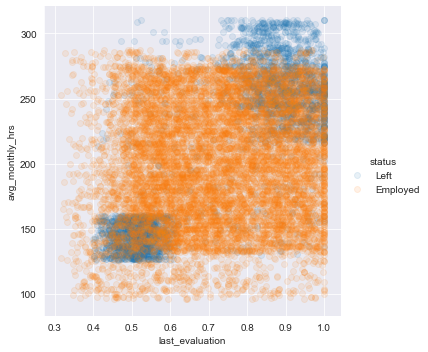

In [26]:
sns.lmplot(x='last_evaluation',
           y='avg_monthly_hrs',
           hue='status',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

#### B.) Plotting another scatterplot of <code style="color:steelblue">'last_evaluation'</code> and <code style="color:steelblue">'avg_monthly_hrs'</code>, but only for employees who have <code style="color:crimson">'Left'</code>.

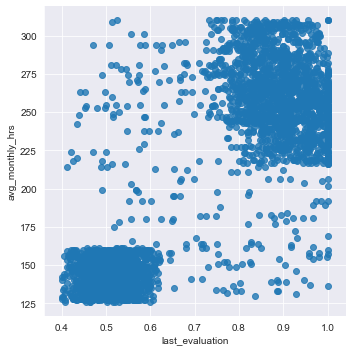

In [27]:
sns.lmplot(x='last_evaluation', y='avg_monthly_hrs', data=df[df.status=='Left'], fit_reg=False)
plt.show()